### Q1. Install MLflow

In [11]:
!mlflow --version

mlflow, version 2.12.2


### Q2. Download and preprocess the data

In [13]:
!ls ./output | wc -l

4


### Q3. Train a model with autolog

In [ ]:
!python train.py --data_path ./output

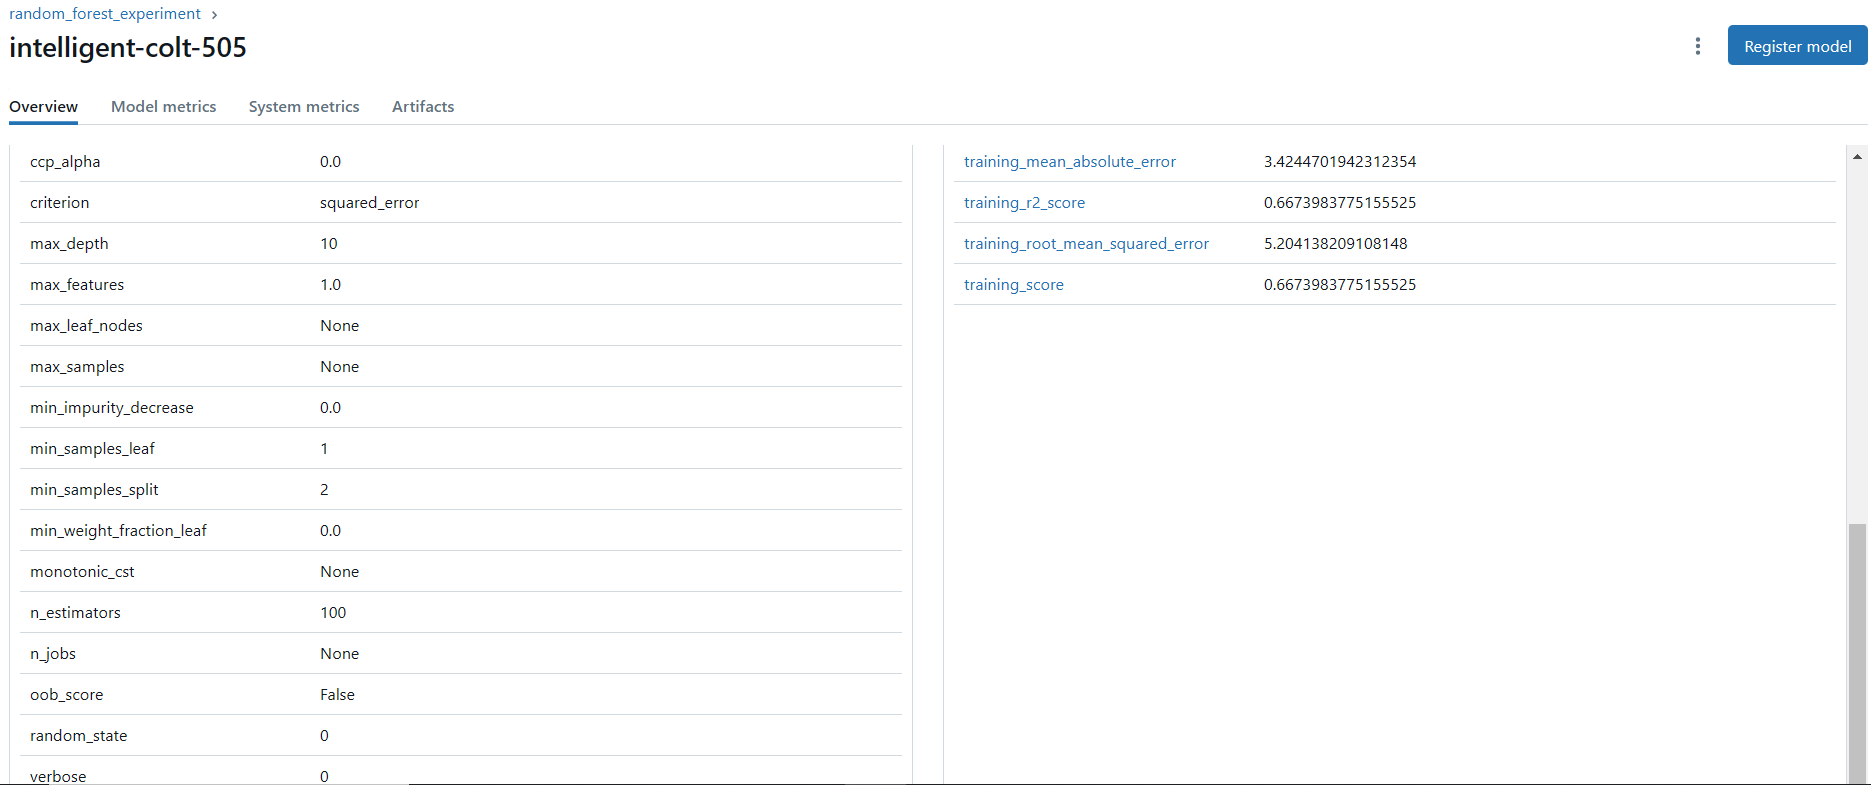

### Q4. Launch the tracking server locally

In [ ]:
!mlflow ui --backend-store-uri sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlflow.db --default-artifact-root ./artifacts

### Q5. Tune the hyperparameters of the model

In [ ]:
!python hpo.py

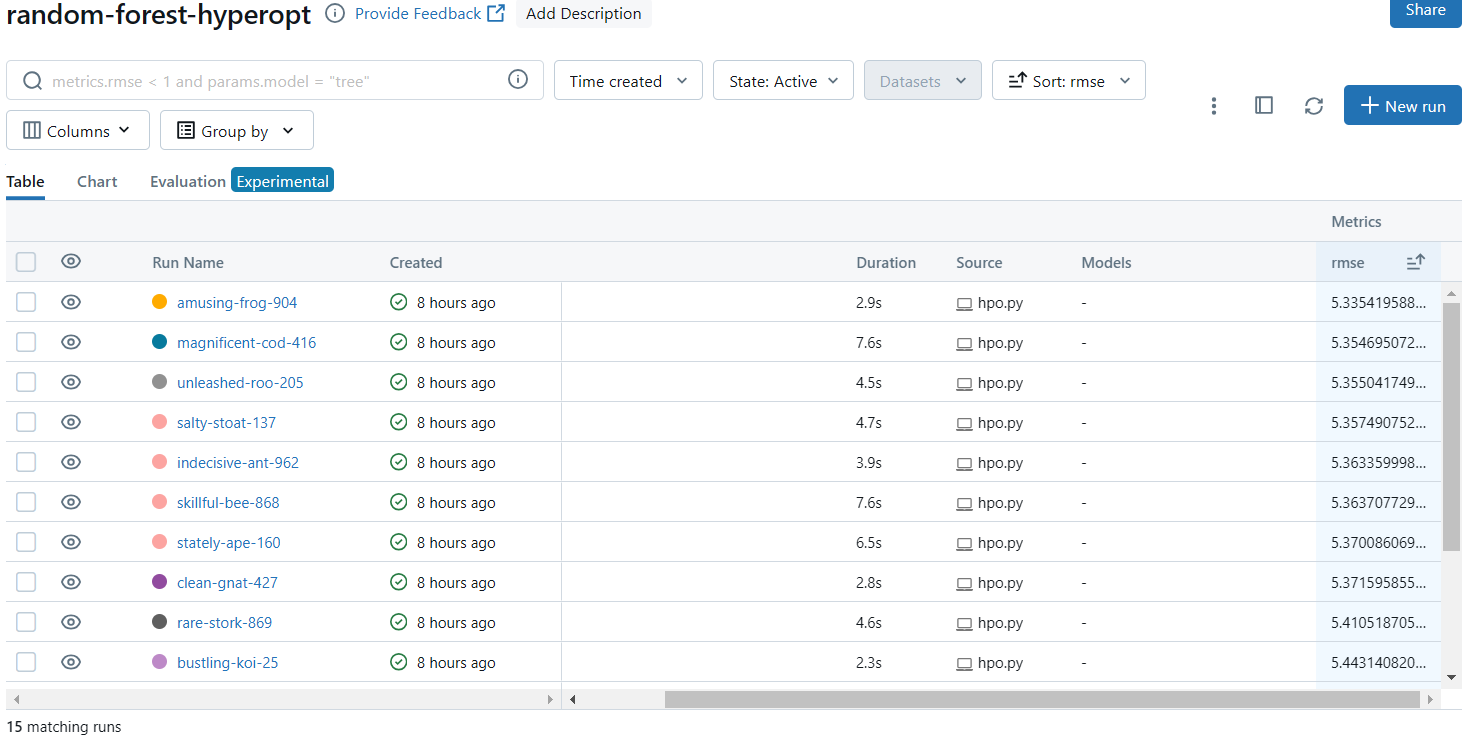

#### The Best Validation RMSE is 5.33541

### Q6. Promote the best model to the model registry

In [ ]:
!python register_model.py

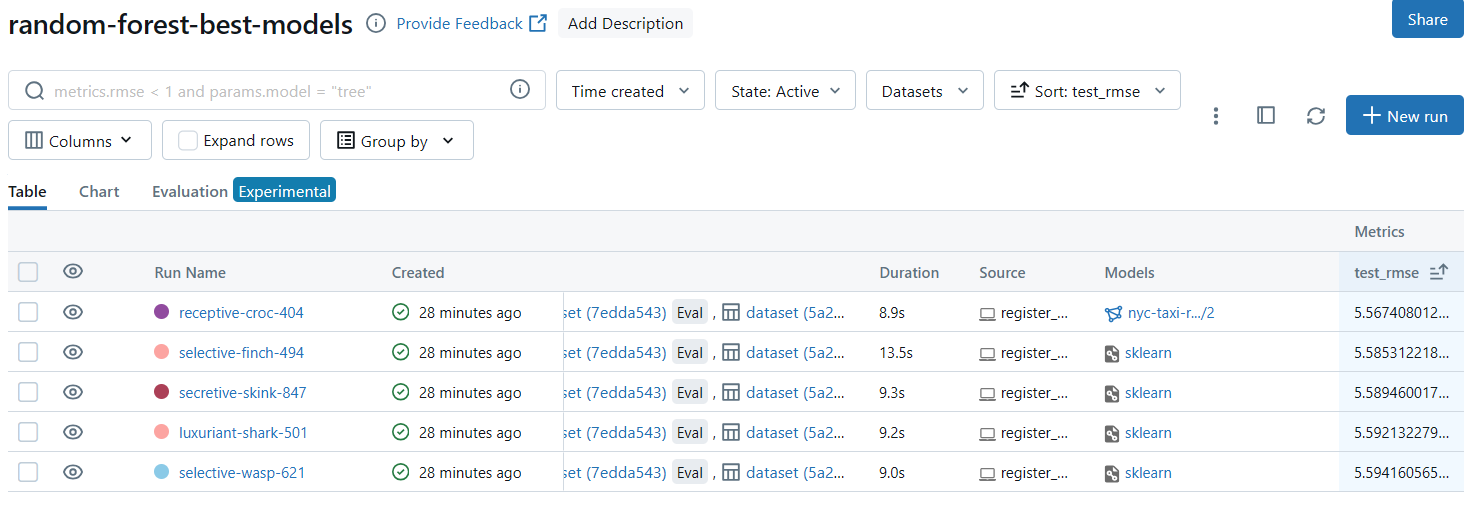

####  The test RMSE of the best model is 5.5674

In [9]:
from mlflow.tracking import MlflowClient

# sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlflow.db
TRACKING_URI = "sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlflow.db"


client = MlflowClient(tracking_uri=TRACKING_URI)

In [10]:
client.search_experiments()

[<Experiment: artifact_location='/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlruns/3', creation_time=1716523277324, experiment_id='3', last_update_time=1716523277324, lifecycle_stage='active', name='random-forest-best-models', tags={}>,
 <Experiment: artifact_location='/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlruns/2', creation_time=1716496845049, experiment_id='2', last_update_time=1716496845049, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>,
 <Experiment: artifact_location='/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlruns/1', creation_time=1716496620782, experiment_id='1', last_update_time=1716496620782, lifecycle_stage='active', name='random_forest_experiment', tags={}>,
 <Experiment: artifact_location='/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlruns/0', creation_time=1716496620772, experiment_id='0', last_update_time=17164

In [3]:
experiment=client.get_experiment(experiment_id='2')

In [4]:
# Show experiment info
print(f"Name: {experiment.name}")
print(f"Experiment ID: {experiment.experiment_id}")
print(f"Artifact Location: {experiment.artifact_location}")
print(f"Lifecycle_stage: {experiment.lifecycle_stage}")

Name: random-forest-hyperopt
Experiment ID: 2
Artifact Location: /home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/homework/mlruns/2
Lifecycle_stage: active


In [7]:
from mlflow.entities import ViewType

runs = client.search_runs(
    experiment_ids='2',
    filter_string="",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=20,
    order_by=["metrics.rmse ASC"]
)

In [8]:
for run in runs:
    print(f"run-id : {run.info.run_id}, rmse : {run.data.metrics}" , end="\n\n")

run-id : 22113fe0c2074a1ab5f96ea3ff40d334, rmse : {'rmse': 5.335419588556921}

run-id : 282cfad8f7154f6fa87ac4f655103586, rmse : {'rmse': 5.354695072530291}

run-id : c50ca7be0a7e484882740b0158d6484c, rmse : {'rmse': 5.355041749098929}

run-id : 70dc107951274c85bc164bbbff23181e, rmse : {'rmse': 5.357490752366866}

run-id : 9c4620b22fa24f58b644766ea8c2351c, rmse : {'rmse': 5.3633599989832135}

run-id : 18bf2f8e289e46678b0a58c710cb5e3b, rmse : {'rmse': 5.363707729018604}

run-id : 21a816dbd3774261afa9fbb0b96dd4ff, rmse : {'rmse': 5.370086069268862}

run-id : 15f70cf606ef43caa41c8337b31aaf28, rmse : {'rmse': 5.37159585587677}

run-id : b46dc38f1a6d4c4587594acaca02c6e5, rmse : {'rmse': 5.410518705423984}

run-id : 7b14526bbcf240cba7ddb8c70e113085, rmse : {'rmse': 5.4431408201543805}

run-id : 1b5ea9cab63c47978be1220d24e397d1, rmse : {'rmse': 5.4646431328121015}

run-id : 174d0a1920dc4267bd4419d34cb1b043, rmse : {'rmse': 5.484068016681342}

run-id : b0b94ab4ba6d4b5e976557c13cef1ae8, rmse : 